In [83]:
# Importing all the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Data Preprocessing

In [84]:
# Importing dataset-About tornadoes
df = pd.read_csv('1950-2023_actual_tornadoes.csv')
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


In [85]:
# Checking the columns
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [86]:
# Total no. of rows
df.shape

(70022, 29)

In [87]:
# Getting more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70022 entries, 0 to 70021
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      70022 non-null  int64  
 1   yr      70022 non-null  int64  
 2   mo      70022 non-null  int64  
 3   dy      70022 non-null  int64  
 4   date    70022 non-null  object 
 5   time    70022 non-null  object 
 6   tz      70022 non-null  int64  
 7   st      70022 non-null  object 
 8   stf     70022 non-null  int64  
 9   stn     70022 non-null  int64  
 10  mag     70022 non-null  int64  
 11  inj     70022 non-null  int64  
 12  fat     70022 non-null  int64  
 13  loss    70022 non-null  float64
 14  closs   70022 non-null  float64
 15  slat    70022 non-null  float64
 16  slon    70022 non-null  float64
 17  elat    70022 non-null  float64
 18  elon    70022 non-null  float64
 19  len     70022 non-null  float64
 20  wid     70022 non-null  int64  
 21  ns      70022 non-null  int64  
 22

In [88]:
# Renaming the column names
def data_cleaning():
    tornado_df = pd.read_csv('1950-2023_actual_tornadoes.csv')
    
    tornado_df.rename(columns = {'om': 'yearly_tornado_number'}, inplace = True)
    tornado_df.rename(columns = {'yr': 'year'}, inplace = True)
    tornado_df.rename(columns = {'mo': 'month'}, inplace = True)
    tornado_df.rename(columns = {'dy': 'day'}, inplace = True)
    tornado_df.rename(columns = {'tz': 'time_zone'}, inplace = True)
    tornado_df.rename(columns = {'st': 'state'}, inplace = True)
    tornado_df.rename(columns = {'stf': 'state_fips_number'}, inplace = True)
    tornado_df.rename(columns = {'stn': 'state_tornado_number'}, inplace = True)
    tornado_df.rename(columns = {'mag': 'magnitude'}, inplace = True)
    tornado_df.rename(columns = {'inj': 'injuries'}, inplace = True)
    tornado_df.rename(columns = {'fat': 'fatalities'}, inplace = True)
    tornado_df.rename(columns = {'loss': 'property_loss'}, inplace = True)
    tornado_df.rename(columns = {'closs': 'crop_loss'}, inplace = True)
    tornado_df.rename(columns = {'slat': 'starting_latitude'}, inplace = True)
    tornado_df.rename(columns = {'slon': 'starting_longitude'}, inplace = True)
    tornado_df.rename(columns = {'elat': 'ending_latitude'}, inplace = True)
    tornado_df.rename(columns = {'elon': 'ending_longitude'}, inplace = True)
    tornado_df.rename(columns = {'len': 'length'}, inplace = True)
    tornado_df.rename(columns = {'wid': 'width'}, inplace = True)
    tornado_df.rename(columns = {'ns': 'number_of_states'}, inplace = True)
    tornado_df.rename(columns = {'sn': 'state_number'}, inplace = True)
    tornado_df.rename(columns = {'sg': 'tornado_segment_number'}, inplace = True)
    tornado_df.rename(columns = {'f1': 'first_county_fips_code'}, inplace = True)
    tornado_df.rename(columns = {'f2': 'second_county_fips_code'}, inplace = True)
    tornado_df.rename(columns = {'f3': 'third_county_fips_code'}, inplace = True)
    tornado_df.rename(columns = {'f4': 'fourth_county_fips_code'}, inplace = True)
    tornado_df.rename(columns = {'fc': 'ef_scale_rating'}, inplace = True)
    
    # Changing the loss values into millions
    tornado_df['property_loss']=tornado_df[['year', 'property_loss']].apply(property_loss_pro, axis=1)
    tornado_df['crop_loss']=tornado_df[['year', 'crop_loss']].apply(crop_loss_pro, axis=1)

    return tornado_df

In [89]:
# Changing the property loss values into millions as it is scaled down in the dataset
def property_loss_pro(cols):
    Year=cols['year']
    P_loss=cols['property_loss']
    
    if Year <= 1995:
        if P_loss == 1:
            P_loss=50.0 / 2
        elif P_loss == 2:
            P_loss=(50.0+500.0) / 2
        elif P_loss == 3:
            P_loss=(500.0+5000.0) / 2
        elif P_loss == 4:
            P_loss=(5000.0+50000.0) / 2
        elif P_loss == 5:
            P_loss=(50000.0+500000.0) / 2
        elif P_loss == 6:
            P_loss=(500000.0+5000000.0) / 2
        elif P_loss == 7:
            P_loss=(5000000.0+50000000.0) / 2
        elif P_loss == 8:
            P_loss=(50000000.0+500000000.0) / 2
        elif P_loss == 9:
            P_loss=5000000000.0
    elif Year >= 1996 and Year <= 2015:
        P_loss= P_loss*1000000.0
        
    return float(P_loss)

In [90]:
# Changing the crop loss values into millions as it is scaled down in the dataset
def crop_loss_pro(cols):
    Year=cols['year']
    C_loss=cols['crop_loss']
    
    if Year >= 2007 and Year <= 2015:
        C_loss=C_loss*1000000.0
        
    return float(C_loss)

EDA

In [91]:
df = data_cleaning()
tornado_df=df[df['year'] >= 2007].copy()

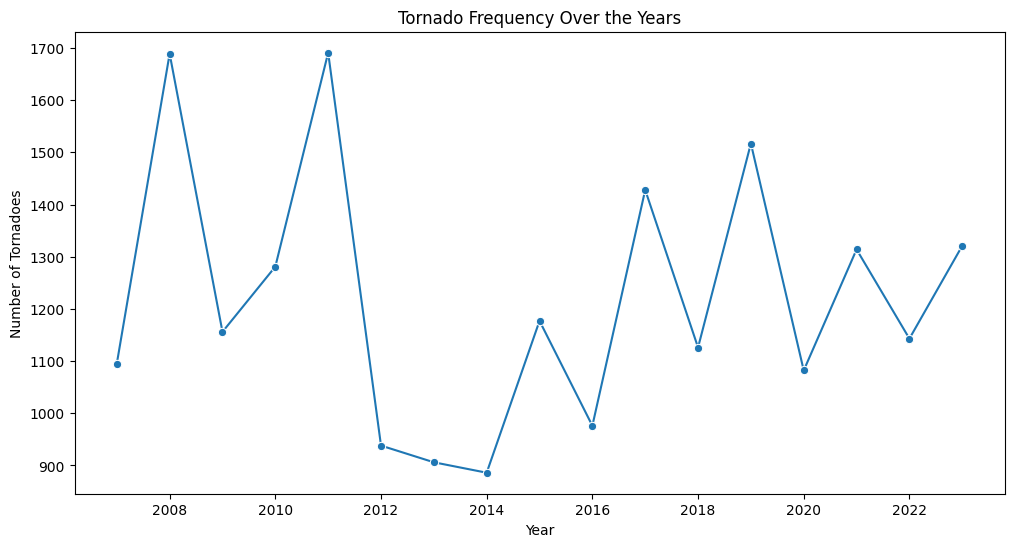

In [92]:
# Tornado Frequency over the years
plt.figure(figsize=(12, 6))
max_tornado_counts = tornado_df.groupby('year')['yearly_tornado_number'].count().reset_index()
sns.lineplot(data=max_tornado_counts, x='year', y='yearly_tornado_number', marker='o')
plt.title('Tornado Frequency Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20112\3629576161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tornado_df, x='month', palette='coolwarm')


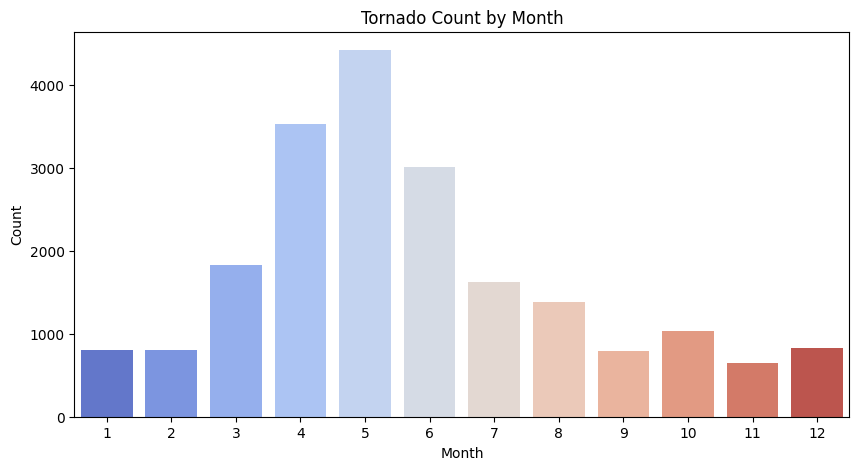

In [93]:
# Tornado Count by Month
plt.figure(figsize=(10, 5))
sns.countplot(data=tornado_df, x='month', palette='coolwarm')
plt.title('Tornado Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

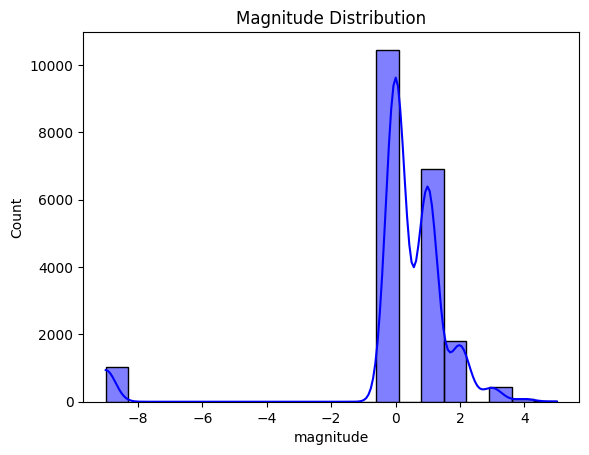

In [94]:
# Distribution of magnitude of tornadoes
sns.histplot(tornado_df['magnitude'], bins=20, kde=True, color='blue')
plt.title('Magnitude Distribution')
plt.show()

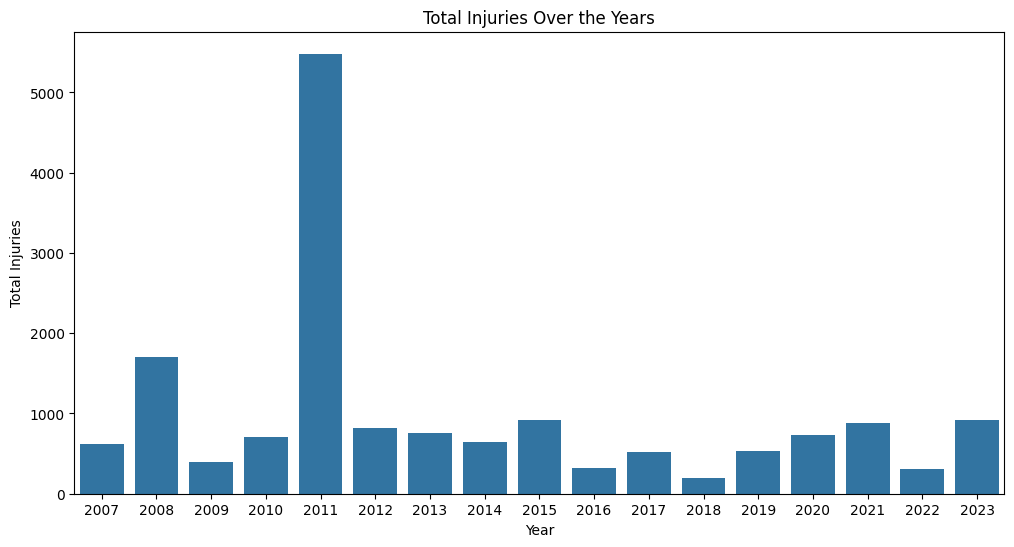

In [95]:
# Total injuries caused by tornadoes over the years
plt.figure(figsize=(12, 6))
max_tornado_counts = tornado_df.groupby('year')['injuries'].sum().reset_index()
sns.barplot(data=max_tornado_counts, x='year', y='injuries')
plt.title('Total Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.show()

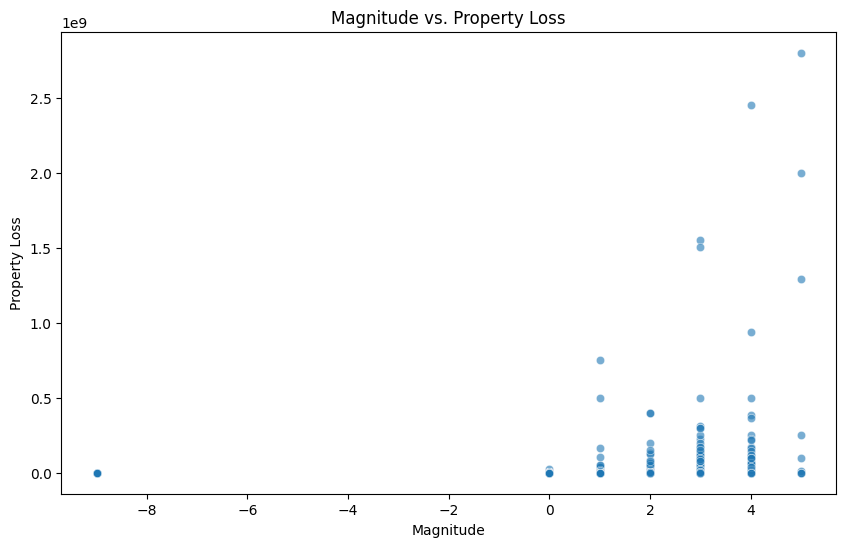

In [96]:
# Tornado magnitude vs Total property Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tornado_df, x='magnitude', y='property_loss', alpha=0.6)
plt.title('Magnitude vs. Property Loss')
plt.xlabel('Magnitude')
plt.ylabel('Property Loss')
plt.show()

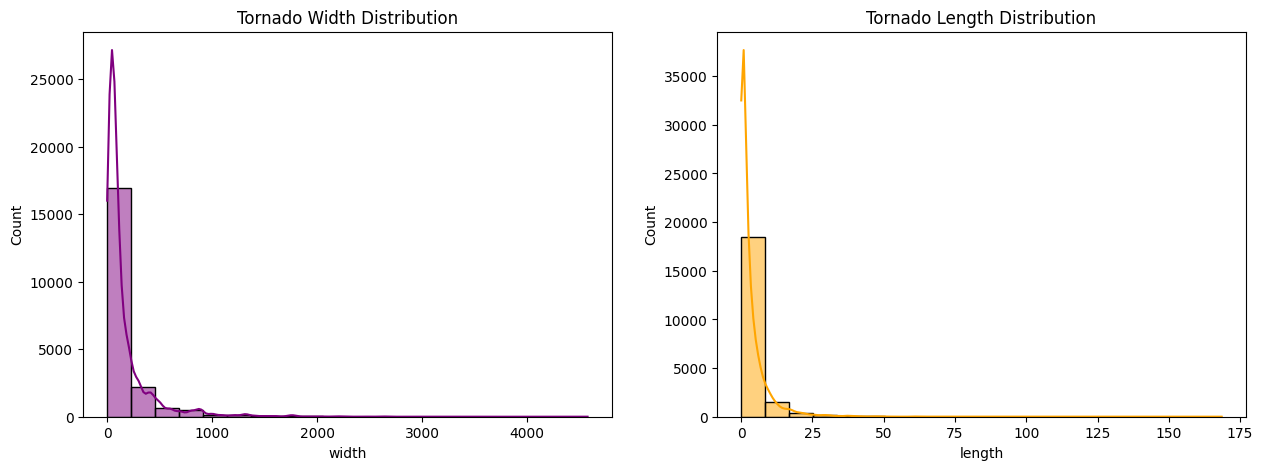

In [97]:
# Tornado width distribution and Tornado Length Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(tornado_df['width'], bins=20, kde=True, ax=axes[0], color='purple')
axes[0].set_title('Tornado Width Distribution')
sns.histplot(tornado_df['length'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Tornado Length Distribution')
plt.show()

In [98]:
# Dropping the columns not needed for modeling
tornado_df.drop('yearly_tornado_number', axis=1, inplace=True)
tornado_df.drop('time_zone', axis=1, inplace=True)
tornado_df.drop('state', axis=1, inplace=True)
tornado_df.drop('date', axis=1, inplace=True)
tornado_df.drop('time', axis=1, inplace=True)
tornado_df.drop('state_tornado_number', axis=1, inplace=True)
tornado_df.drop('first_county_fips_code', axis=1, inplace=True)
tornado_df.drop('second_county_fips_code', axis=1, inplace=True)
tornado_df.drop('third_county_fips_code', axis=1, inplace=True)
tornado_df.drop('fourth_county_fips_code', axis=1, inplace=True)

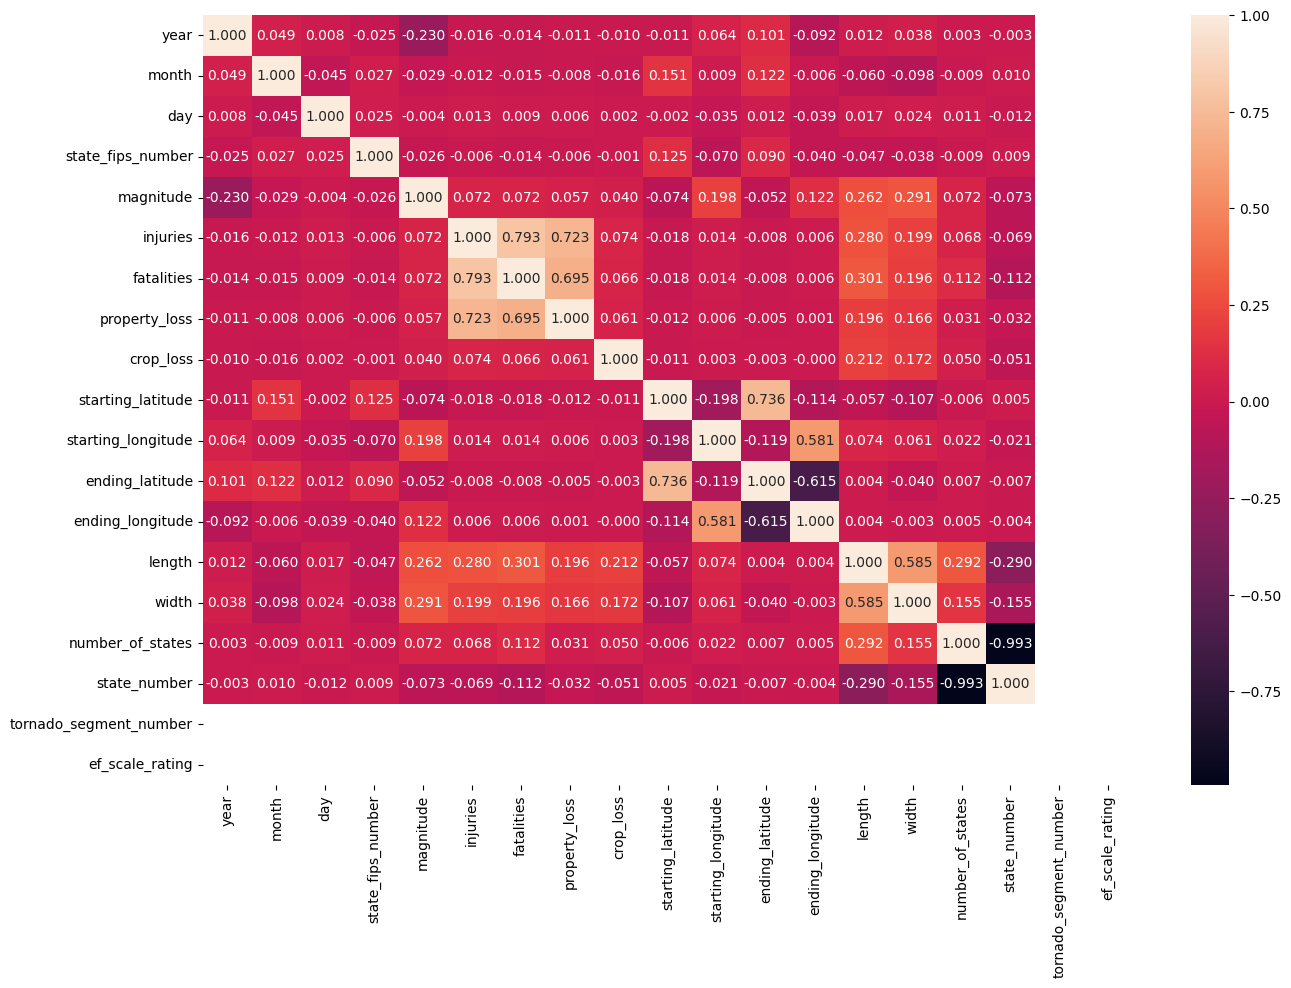

In [99]:
# Correlation Graph
corr = tornado_df.corr()
corr = (corr)
a4_dims=(15,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,annot=True,fmt='.3f',xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

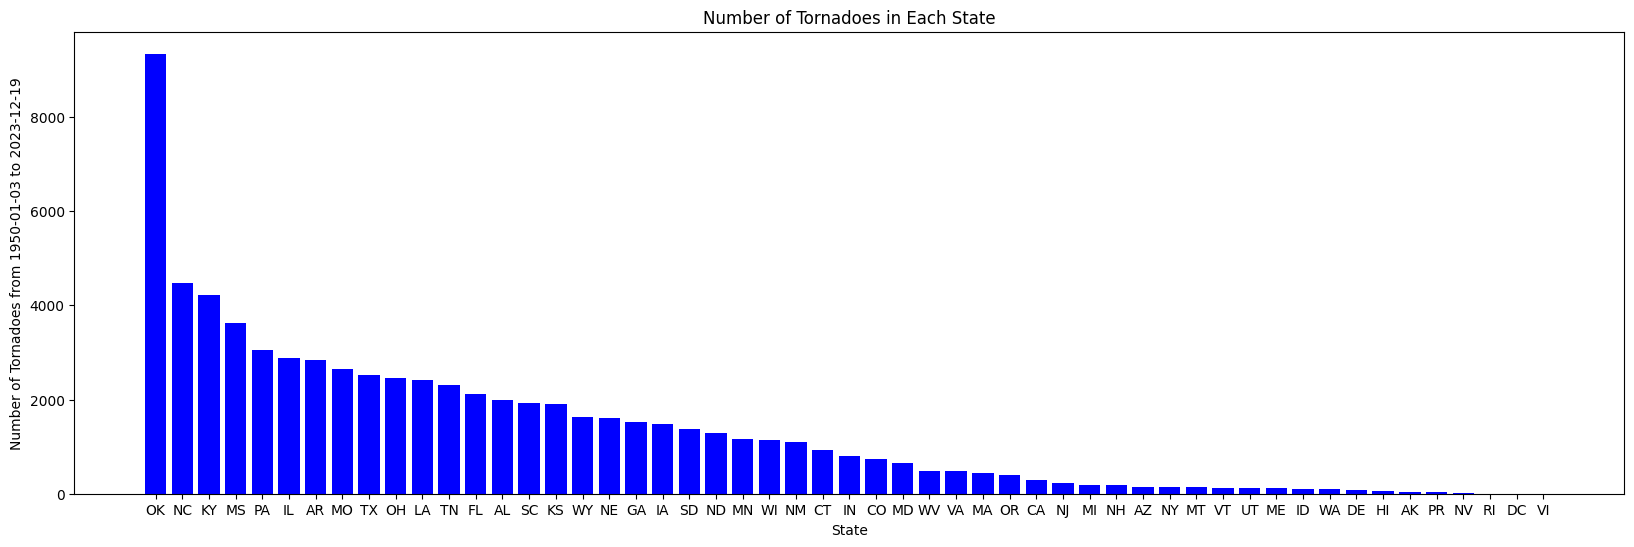

In [100]:
# Number of tornadoes in each state
plt.figure(figsize=(20, 6))
plt.bar(df['state'].unique(),df['state'].value_counts(),color='b')
plt.xlabel('State')
plt.ylabel('Number of Tornadoes from 1950-01-03 to 2023-12-19')
plt.title('Number of Tornadoes in Each State')
plt.show()

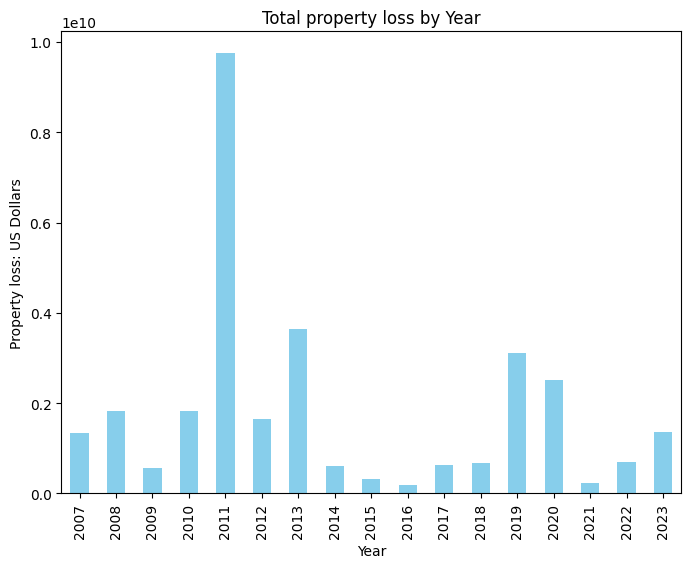

In [ ]:
# Total property loss by each year
p_loss_df=df[df['year'] >= 2007].copy()
yearly_totals = p_loss_df.groupby('year')['property_loss'].sum()
plt.figure(figsize=(8, 6))
yearly_totals.plot(kind='bar', color='skyblue')
plt.title('Total property loss by Year')
plt.xlabel('Year')
plt.ylabel('Property loss: US Dollars')
plt.show()

Data - Preprocessing

In [ ]:
# Loading the data again
df = pd.read_csv('1950-2023_actual_tornadoes.csv')
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


In [ ]:
# Getting data after 2007
df_updated=df[df['yr'] >= 2007].copy()
df_updated.loc[df_updated['yr'] <= 2015, 'loss'] *= 1000000
df_updated.loc[df_updated['yr'] <= 2015, 'closs'] *= 1000000

# Dropping time zone, state name, date and time columns
df_updated.drop('tz', axis=1, inplace=True)
df_updated.drop('st', axis=1, inplace=True)
df_updated.drop('date', axis=1, inplace=True)
df_updated.drop('time', axis=1, inplace=True)
df_updated.drop('yr', axis=1, inplace=True)
df_updated.drop('mo', axis=1, inplace=True)
df_updated.drop('dy', axis=1, inplace=True)
df_updated.drop('om', axis=1, inplace=True)
df_updated.drop('stn', axis=1, inplace=True)
df_updated.drop('f1', axis=1, inplace=True)
df_updated.drop('f2', axis=1, inplace=True)
df_updated.drop('f3', axis=1, inplace=True)
df_updated.drop('f4', axis=1, inplace=True)
df_updated.drop('fc', axis=1, inplace=True)

# Renaming the column 
df_updated.rename(columns = {'stf': 'state_fips_number'}, inplace = True)
df_updated.rename(columns = {'mag': 'magnitude'}, inplace = True)
df_updated.rename(columns = {'inj': 'injuries'}, inplace = True)
df_updated.rename(columns = {'fat': 'fatalities'}, inplace = True)
df_updated.rename(columns = {'loss': 'property_loss'}, inplace = True)
df_updated.rename(columns = {'closs': 'crop_loss'}, inplace = True)
df_updated.rename(columns = {'slat': 'starting_latitude'}, inplace = True)
df_updated.rename(columns = {'slon': 'starting_longitude'}, inplace = True)
df_updated.rename(columns = {'elat': 'ending_latitude'}, inplace = True)
df_updated.rename(columns = {'elon': 'ending_longitude'}, inplace = True)
df_updated.rename(columns = {'len': 'length'}, inplace = True)
df_updated.rename(columns = {'wid': 'width'}, inplace = True)
df_updated.rename(columns = {'ns': 'number_of_states'}, inplace = True)
df_updated.rename(columns = {'sn': 'state_number'}, inplace = True)
df_updated.rename(columns = {'sg': 'tornado_segment_number'}, inplace = True)

# Creating the label total_loss = property_loss + crop_loss
df_updated['total_loss']=df_updated['property_loss'] + df_updated['crop_loss']
df_updated.drop('property_loss', axis=1, inplace=True)  
df_updated.drop('crop_loss', axis=1, inplace=True)

In [ ]:
# Final dataset
df_updated.head()

,state_fips_number,magnitude,injuries,fatalities,starting_latitude,starting_longitude,ending_latitude,ending_longitude,length,width,number_of_states,state_number,tornado_segment_number,total_loss
49296,48,1,0,0,34.83,-101.97,34.92,-101.80,11.46,300,1,1,1,90000.0
49297,48,0,0,0,30.41,-94.01,30.41,-94.01,1.00,20,1,1,1,2000.0
49298,29,0,0,0,38.75,-93.86,38.75,-93.86,0.10,25,1,1,1,0.0
49299,40,0,0,0,34.05,-95.23,34.05,-95.23,0.10,50,1,1,1,0.0
49300,22,1,0,0,30.85,-90.15,30.85,-90.15,0.20,25,1,1,1,30000.0


In [ ]:
# Total different column values
df_updated.total_loss.value_counts()

total_loss
0.0           10064
50000.0         781
100000.0        726
10000.0         724
5000.0          568
              ...  
309000.0          1
458000.0          1
13100000.0        1
8780000.0         1
3700000.0         1
Name: count, Length: 752, dtype: int64

In [ ]:
# Total dataset
df_updated.shape

(20726, 14)

In [ ]:
# Creating features and labels
X = df_updated.iloc[:, :-1]
y = df_updated.iloc[:, -1]

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Applying PCA for finding Optimal Number of Components
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

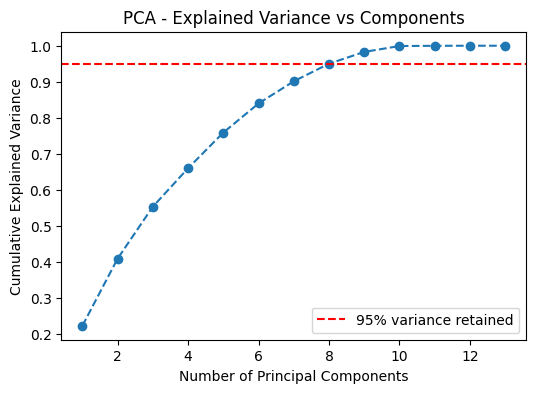

In [ ]:
# Explained Variance to determine how many components to keep
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.95, color="r", linestyle="dashed", label="95% variance retained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs Components")
plt.legend()
plt.show()

In [ ]:
# Getting the number of components that explain at least 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"\nOptimal Number of PCA Components: {n_components}")


Optimal Number of PCA Components: 8


In [ ]:
# Transforming data using PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [114]:
# Create a binary target for classification
y_train_class = (y_train > 0).astype(int)
y_test_class = (y_test > 0).astype(int)

In [ ]:
# Implementing Logistic Regression for classification
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_pca, y_train_class)
f1_logreg = f1_score(y_test_class, clf_logreg.predict(X_test_pca), average="weighted")

In [ ]:
# Implementing Random Forest for classification
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_pca, y_train_class)
f1_rf = f1_score(y_test_class, clf_rf.predict(X_test_pca), average="weighted")

In [ ]:
# Implementing XGBoost for classification
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
clf_xgb.fit(X_train_pca, y_train_class)
f1_xgb = f1_score(y_test_class, clf_xgb.predict(X_test_pca), average="weighted")

c:\Users\MSI GF66\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [20:02:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Getting the best model from the above 3 models
best_class_model, y_pred_class = max([(f1_logreg, "Logistic Regression", clf_logreg.predict(X_test_pca)),
                                      (f1_rf, "Random Forest", clf_rf.predict(X_test_pca)),
                                      (f1_xgb, "XGBoost", clf_xgb.predict(X_test_pca))], key=lambda x: x[0])[1:]


In [119]:
print(f"\nClassification Model F1-Scores (After PCA):")
print(f"Logistic Regression: {f1_logreg:.4f}")
print(f"Random Forest: {f1_rf:.4f}")
print(f"XGBoost: {f1_xgb:.4f}")
print(f"\nBest Classification Model: {best_class_model}")


Classification Model F1-Scores (After PCA):
Logistic Regression: 0.7037
Random Forest: 0.7851
XGBoost: 0.7779

Best Classification Model: Random Forest


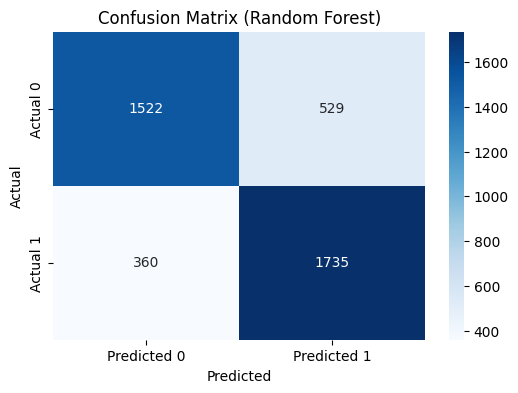

In [ ]:
# Confusion Matrix - of the classification model
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix ({best_class_model})")
plt.show()

In [ ]:
# Only using the non-zero values to use in the regression model
X_train_reg_pca = X_train_pca[y_train > 0]
y_train_reg = np.log1p(y_train[y_train > 0])

X_test_reg_pca = X_test_pca[y_test > 0]
y_test_reg = np.log1p(y_test[y_test > 0])

In [ ]:
# Implementing Linear Regression Model for regression
reg_lr = LinearRegression()
reg_lr.fit(X_train_reg_pca, y_train_reg)
y_pred_lr = np.expm1(reg_lr.predict(X_test_reg_pca))

In [ ]:
# Implementing Random Forest Regressor for regression
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train_reg_pca, y_train_reg)
y_pred_rf = np.expm1(reg_rf.predict(X_test_reg_pca))

In [ ]:
# Implementing XGBoost Regressor for regression
reg_xgb = XGBRegressor(n_estimators=100, random_state=42)
reg_xgb.fit(X_train_reg_pca, y_train_reg)
y_pred_xgb = np.expm1(reg_xgb.predict(X_test_reg_pca))

In [ ]:
# Implementing MLP for regression
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg_pca.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
# Using Adam optimizer as well as Huber loss
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.Huber(delta=1.0))

model_nn.fit(X_train_reg_pca, y_train_reg, epochs=100, batch_size=32, verbose=0)

y_pred_nn = np.expm1(model_nn.predict(X_test_reg_pca).flatten())

66/66 [==============================] - 0s 938us/step


In [ ]:
# Getting MAE of all the models
mae_lr = mean_absolute_error(y_test[y_test > 0], y_pred_lr)
mae_rf = mean_absolute_error(y_test[y_test > 0], y_pred_rf)
mae_xgb = mean_absolute_error(y_test[y_test > 0], y_pred_xgb)
mae_nn = mean_absolute_error(y_test[y_test > 0], y_pred_nn)

print(f"\nRegression MAE Scores:")
print(f"Linear Regression: {mae_lr:.2f}")
print(f"Random Forest: {mae_rf:.2f}")
print(f"XGBoost: {mae_xgb:.2f}")
print(f"Neural Network: {mae_nn:.2f}")


Regression MAE Scores:
Linear Regression: 3907166.33
Random Forest: 2832762.98
XGBoost: 2906321.01
Neural Network: 2816565.24


In [ ]:
# Checking if MAE is good
range_of_target = np.max(y_test[y_test > 0]) - np.min(y_test[y_test > 0])
threshold = 0.1 * range_of_target  # Consider MAE good if <10% of range

print(f"MAE: {mae_nn}")
if mae_rf < threshold:
    print("The MAE is good (low relative to target range).")
else:
    print("The MAE is high (consider improving the model).")

MAE: 2816565.240946141
The MAE is good (low relative to target range).


In [129]:
# Choose the best performing regressor based on lowest MAE
best_regressor = min([(mae_lr, "Linear Regression"), (mae_rf, "Random Forest"), 
                      (mae_xgb, "XGBoost"), (mae_nn, "Neural Network")])[1]

print(f"\nBest performing regression model: {best_regressor}")


Best performing regression model: Neural Network


In [ ]:
# Creating a final prediction array filled with zeros
y_final_pred = np.zeros_like(y_test, dtype=float)

# Find indices where y_test is non-zero
non_zero_indices = (y_test > 0)

In [131]:
# Assign predictions from the best regression model only to non-zero indices
if best_regressor == "Linear Regression":
    y_final_pred[non_zero_indices] = y_pred_lr
elif best_regressor == "Random Forest":
    y_final_pred[non_zero_indices] = y_pred_rf
elif best_regressor == "XGBoost":
    y_final_pred[non_zero_indices] = y_pred_xgb
else:
    y_final_pred[non_zero_indices] = y_pred_nn


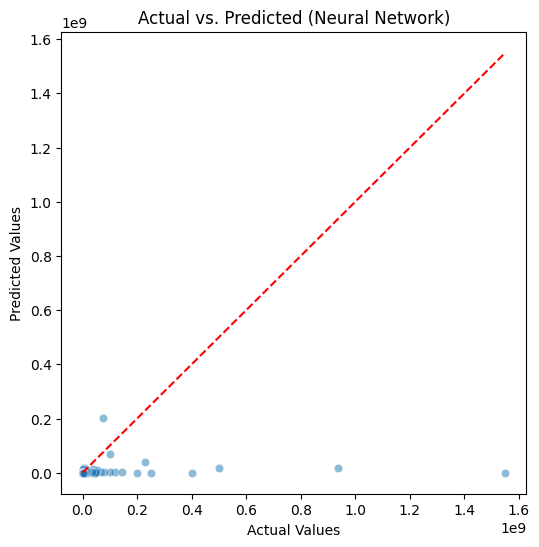

In [ ]:
# Regression Performance: Actual vs. Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test[y_test > 0], y=y_final_pred[y_test > 0], alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted ({best_regressor})")
plt.show()

In [ ]:
# Final MAE value after combining both models
final_mae = mean_absolute_error(y_test, y_final_pred)
print(f"\nFinal Regression MAE (After Combining Classification & Regression): {final_mae:.2f}")


Final Regression MAE (After Combining Classification & Regression): 1423228.22


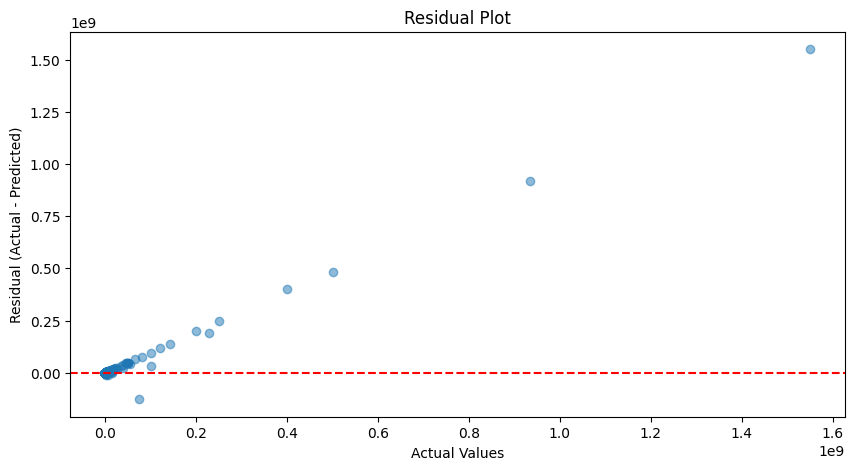

In [ ]:
# Residual Plot
residuals = y_test - y_final_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


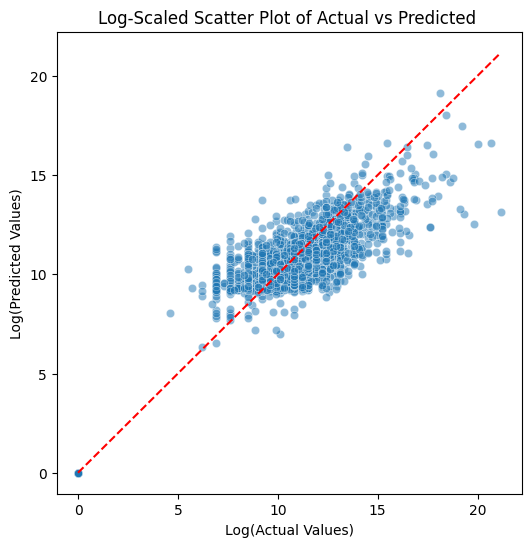

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add small value to avoid log(0)
epsilon = 1e-3
y_actual_log = np.log1p(y_test + epsilon)
y_predicted_log = np.log1p(y_final_pred + epsilon)

# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_actual_log, y=y_predicted_log, alpha=0.5)
plt.plot([min(y_actual_log), max(y_actual_log)], [min(y_actual_log), max(y_actual_log)], color='red', linestyle='--')  
plt.xlabel("Log(Actual Values)")
plt.ylabel("Log(Predicted Values)")
plt.title("Log-Scaled Scatter Plot of Actual vs Predicted ")
plt.show()
